In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix
 

In [34]:
results = pd.read_csv("/home/divya/Documents/results.csv")


In [35]:
# y_true = results.loc[:,'Actual']
y_true=[]
for i in range (len(results['Actual'])):
    y_true.append(results['Actual'][i])
# y_true = results['Actual']
print(y_true)


['H', 'A', 'D', 'H', 'D', 'A', 'H', 'D', 'A', 'H', 'H', 'A', 'D', 'H', 'H', 'A', 'D', 'H', 'D', 'D', 'H', 'A', 'A', 'A', 'A', 'A', 'H', 'A', 'A', 'D', 'D', 'D', 'H', 'H', 'H', 'D', 'H', 'A', 'H', 'D']


In [36]:
# y_true = results.loc[:,'Actual']
y_pred=[]
for i in range (len(results['Predicted'])):
    y_pred.append(results['Predicted'][i])
# y_true = results['Actual']
print(y_pred)

['H', 'A', 'H', 'H', 'A', 'H', 'H', 'H', 'A', 'H', 'H', 'A', 'A', 'H', 'H', 'A', 'H', 'H', 'H', 'A', 'A', 'A', 'H', 'H', 'H', 'A', 'H', 'A', 'H', 'H', 'A', 'H', 'H', 'H', 'H', 'H', 'H', 'A', 'H', 'H']


In [37]:
classes = ['H','A','D']

confusion_matrix(y_true, y_pred, labels=['H', 'A', 'D'])

array([[14,  1,  0],
       [ 5,  8,  0],
       [ 8,  4,  0]])

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix
[[14  1  0]
 [ 5  8  0]
 [ 8  4  0]]


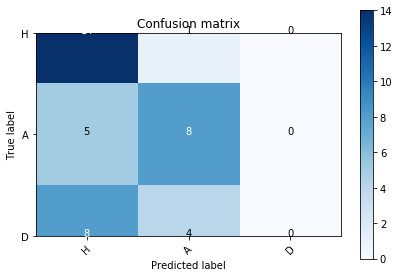

In [10]:
cnf_matrix=confusion_matrix(y_true, y_pred, labels=['H', 'A', 'D'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['H', 'A', 'D'],
                      title='Confusion matrix')

In [38]:
accuracy_score(y_true,y_pred)

0.55

In [39]:
from sklearn.metrics import precision_recall_fscore_support as score
classification_report(y_true,y_pred,target_names = classes)

'              precision    recall  f1-score   support\n\n           H       0.62      0.62      0.62        13\n           A       0.00      0.00      0.00        12\n           D       0.52      0.93      0.67        15\n\n    accuracy                           0.55        40\n   macro avg       0.38      0.52      0.43        40\nweighted avg       0.39      0.55      0.45        40\n'

In [40]:
precision,recall,fscore,support=score(y_true,y_pred)
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(fscore))
print('Support   : {}'.format(support))

Precision : [0.62 0.   0.52]
Recall    : [0.62 0.   0.93]
F-score   : [0.62 0.   0.67]
Support   : [13 12 15]


In [52]:
def plot_confusion_matrix(cm,
                          classes,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    classes: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(4, 3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if classes is not None:
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [53]:
confusion_matrix(y_true,y_pred,classes)

array([[14,  1,  0],
       [ 5,  8,  0],
       [ 8,  4,  0]])

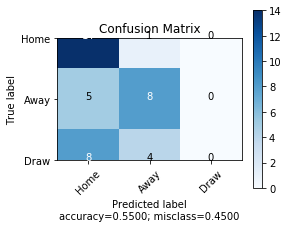

In [64]:
plot_confusion_matrix(cm= np.array([[ 14,  1,   0],
                                              [  5,  8,  0],
                                              [  8,  4, 0]]), 
                      normalize    = False,
                      classes = ['Home', 'Away', 'Draw'],
                      title = "Confusion Matrix")

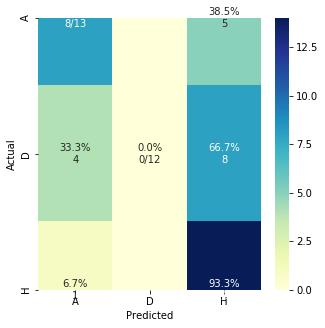

In [103]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(y_true, y_pred)

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,5)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.savefig(filename)

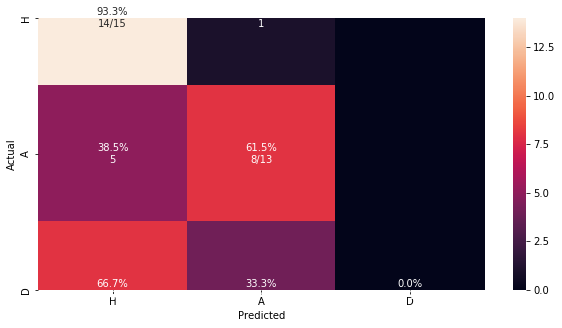

In [75]:
cm_analysis(y_true,y_pred,'conf_matrix' ,classes)

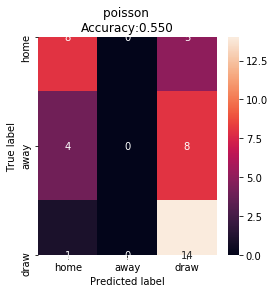

In [88]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# clf = SVC(kernel = 'linear').fit(x_train,y_train)
# clf.predict(x_train)
# y_pred = clf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_true, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,index = ['home','away','draw'], columns = ['home','away','draw'])

plt.figure(figsize=(4,4))
sns.heatmap(cm_df, annot=True)
plt.title('poisson \nAccuracy:{0:.3f}'.format(accuracy_score(y_true, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [89]:
cm = confusion_matrix(y_true, y_pred) 

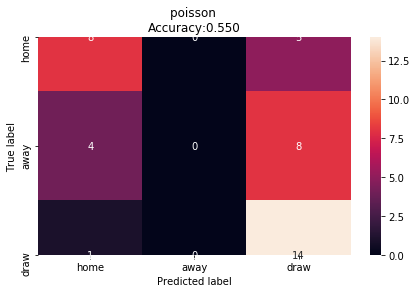

In [91]:
cm_df = pd.DataFrame(cm,
                     index = ['home','away','draw'], 
                     columns = ['home','away','draw'])

plt.figure(figsize=(7,4))
sns.heatmap(cm_df, annot=True)
plt.title('poisson \nAccuracy:{0:.3f}'.format(accuracy_score(y_true, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()